In [1]:
library(data.table)
library(ggplot2)
library(latex2exp)


In [2]:
time <- as.integer(50)

In [3]:
N_AGENTS <- 1134

In [324]:
N_AGENTS <- 12625

In [39]:
mypath <- "../../log/EmailURV-apathy-async"

In [40]:
#mypath <- "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5"

In [41]:
list.dirs <- function(path=".", pattern=NULL, all.dirs=FALSE,
  full.names=FALSE, ignore.case=FALSE) {
  # use full.names=TRUE to pass to file.info
  all <- list.files(path, pattern, all.dirs,
           full.names=TRUE, recursive=FALSE, ignore.case)
  dirs <- all[file.info(all)$isdir]
  # determine whether to return full names or just dir names
  if(isTRUE(full.names))
    return(dirs)
  else
    return(basename(dirs))
}

In [42]:
list.dirs(mypath)

[1] "2019_10_03_22_00_07" "2019_10_03_22_00_09" "2019_10_03_22_00_18"
  [4] "2019_10_03_22_00_20" "2019_10_03_22_00_29" "2019_10_03_22_00_31"
  [7] "2019_10_03_22_00_40" "2019_10_03_22_00_42" "2019_10_03_22_00_51"
 [10] "2019_10_03_22_00_53" "2019_10_03_22_01_02" "2019_10_03_22_01_04"
 [13] "2019_10_03_22_01_12" "2019_10_03_22_01_14" "2019_10_03_22_01_23"
 [16] "2019_10_03_22_01_25" "2019_10_03_22_01_34" "2019_10_03_22_01_36"
 [19] "2019_10_03_22_01_45" "2019_10_03_22_01_48" "2019_10_03_22_01_57"
 [22] "2019_10_03_22_02_00" "2019_10_03_22_02_08" "2019_10_03_22_02_11"
 [25] "2019_10_03_22_02_19" "2019_10_03_22_02_22" "2019_10_03_22_02_30"
 [28] "2019_10_03_22_02_33" "2019_10_03_22_02_41" "2019_10_03_22_02_45"
 [31] "2019_10_03_22_02_52" "2019_10_03_22_02_56" "2019_10_03_22_03_03"
 [34] "2019_10_03_22_03_07" "2019_10_03_22_03_15" "2019_10_03_22_03_19"
 [37] "2019_10_03_22_03_26" "2019_10_03_22_03_30" "2019_10_03_22_03_37"
 [40] "2019_10_03_22_03_42" "2019_10_03_22_03_49" "2019_10_03_22_03_54"
 [43] "2019_10_03_22_04_01" "2019_10_03_22_04_05" "2019_10_03_22_04_57"
 [46] "2019_10_03_22_05_00" "2019_10_03_22_05_07" "2019_10_03_22_05_11"
 [49] "2019_10_03_22_05_19" "2019_10_03_22_05_23" "2019_10_03_22_05_30"
 [52] "2019_10_03_22_05_34" "2019_10_03_22_05_42" "2019_10_03_22_05_45"
 [55] "2019_10_03_22_05_54" "2019_10_03_22_05_57" "2019_10_03_22_06_05"
 [58] "2019_10_03_22_06_08" "2019_10_03_22_06_16" "2019_10_03_22_06_18"
 [61] "2019_10_03_22_06_27" "2019_10_03_22_06_29" "2019_10_03_22_06_38"
 [64] "2019_10_03_22_06_40" "2019_10_03_22_06_50" "2019_10_03_22_06_53"
 [67] "2019_10_03_22_07_01" "2019_10_03_22_07_04" "2019_10_03_22_07_12"
 [70] "2019_10_03_22_07_15" "2019_10_03_22_07_23" "2019_10_03_22_07_26"
 [73] "2019_10_03_22_07_34" "2019_10_03_22_07_38" "2019_10_03_22_07_46"
 [76] "2019_10_03_22_07_50" "2019_10_03_22_07_58" "2019_10_03_22_08_02"
 [79] "2019_10_03_22_08_10" "2019_10_03_22_08_14" "2019_10_03_22_08_23"
 [82] "2019_10_03_22_08_26" "2019_10_03_22_08_35" "2019_10_03_22_08_38"
 [85] "2019_10_03_22_08_40" "2019_10_03_22_08_45" "2019_10_03_22_08_48"
 [88] "2019_10_03_22_08_51" "2019_10_03_22_08_53" "2019_10_03_22_09_00"
 [91] "2019_10_03_22_09_02" "2019_10_03_22_09_04" "2019_10_03_22_09_06"
 [94] "2019_10_03_22_09_13" "2019_10_03_22_09_17" "2019_10_03_22_09_18"
 [97] "2019_10_03_22_09_20" "2019_10_03_22_09_27" "2019_10_03_22_09_31"
[100] "2019_10_03_22_09_32" "2019_10_03_22_09_34" "2019_10_03_22_09_41"
[103] "2019_10_03_22_09_46" "2019_10_03_22_09_47" "2019_10_03_22_09_50"
[106] "2019_10_03_22_09_56" "2019_10_03_22_10_01" "2019_10_03_22_10_02"
[109] "2019_10_03_22_10_04" "2019_10_03_22_10_09" "2019_10_03_22_10_15"
[112] "2019_10_03_22_10_16" "2019_10_03_22_10_56" "2019_10_03_22_11_06"
[115] "2019_10_03_22_11_15" "2019_10_03_22_11_16" "2019_10_03_22_11_20"
[118] "2019_10_03_22_11_28" "2019_10_03_22_11_29" "2019_10_03_22_11_33"
[121] "2019_10_03_22_11_41" "2019_10_03_22_11_42" "2019_10_03_22_11_47"
[124] "2019_10_03_22_11_55" "2019_10_03_22_11_56" "2019_10_03_22_12_01"
[127] "2019_10_03_22_12_08" "2019_10_03_22_12_10" "2019_10_03_22_12_16"
[130] "2019_10_03_22_12_22" "2019_10_03_22_12_24" "2019_10_03_22_12_30"
[133] "2019_10_03_22_12_36" "2019_10_03_22_12_38" "2019_10_03_22_12_44"
[136] "2019_10_03_22_12_49" "2019_10_03_22_12_50" "2019_10_03_22_12_51"
[139] "2019_10_03_22_12_57" "2019_10_03_22_13_02" "2019_10_03_22_13_03"
[142] "2019_10_03_22_13_11" "2019_10_03_22_13_15" "2019_10_03_22_13_16"
[145] "2019_10_03_22_13_17" "2019_10_03_22_13_25" "2019_10_03_22_13_29"
[148] "2019_10_03_22_13_30" "2019_10_03_22_13_31" "2019_10_03_22_13_39"
[151] "2019_10_03_22_13_42" "2019_10_03_22_13_44" "2019_10_03_22_13_53"
[154] "2019_10_03_22_13_57" "2019_10_03_22_13_58" "2019_10_03_22_13_59"
[157] "2019_10_03_22_14_07" "2019_10_03_22_14_11" "2019_10_03_22_14_13"
[160] "2019_10_03_22_14_21" "2019_10_03_22_14_25" "2019_10_03_22_14_27"
[163] "2019_10_03_22_14_28" "2019_10_03_22_14_36" "2019_10_03_22_14_40"
[166] "2019_10_03_22_14_42" "2019_10_03_22

In [43]:
thepath = list.dirs(mypath)[1]

In [44]:
filename = paste(mypath, '/', thepath, '/', 'k_core.csv', sep = "")

In [45]:
DF <- read.csv(file = filename, skip=12)

In [46]:
tempDF <- DF[DF$state =='i',]
tempDF <- tempDF[tempDF$time == 1,]

In [47]:
tempDF

,time,agent,k.core,state,degree
1110,1,1109,1,i,1


In [48]:
agent <- as.integer(tempDF['agent'])
kcore <- as.integer(tempDF['k.core'])

In [49]:
DF$'agent.init' <- agent
DF$'k.core.init' <- kcore
DF$'density' <- 1

In [50]:
DT <- data.table(DF)

In [51]:
DT1 = DT[, sum(density), by=list(time, state)]

In [52]:
names(DT1)[names(DT1)=="V1"] <- "density"

In [53]:
DT1$density <- DT1$density / N_AGENTS

In [54]:
DT1$'agent.init' <- agent
DT1$'k.core.init' <- kcore

In [55]:
tempDT1 <- DT1[DT1$state == 'r']
tempDT1 <- tempDT1[tempDT1$time == 50]
density <- as.numeric(tempDT1[,'density'])

In [56]:
DT1 = DT1[DT1$state == 'r']
DT1[,state:=NULL]

## All datasets

Assemble everything and do the loops

In [57]:
emptytable <- data.table()
lista = list.dirs(mypath)
for (i in lista){    
    filename = paste(mypath, '/', i, '/', 'k_core.csv', sep = "")
    #print(filename)
    DF <- read.csv(file = filename, skip=12)
    tempDF <- DF[DF$state =='i',]
    tempDF <- tempDF[tempDF$time == 1,]

    agent <- as.integer(tempDF['agent'])
    kcore <- as.integer(tempDF['k.core'])

    DF$'agent.init' <- agent
    DF$'k.core.init' <- kcore
    DF$'density' <- 1
    DF$'density.mean' <- 1
    DF$'density.std' <- 1

    DT <- data.table(DF)
    DT1 = DT[, sum(density), by=list(time, state)]
    
    names(DT1)[names(DT1)=="V1"] <- "density"

    DT1$density <- DT1$density / N_AGENTS

    DT1$'agent.init' <- agent
    DT1$'k.core.init' <- kcore
    
    tempDT1 <- DT1[DT1$state == 'r']
    tempDT1 <- tempDT1[tempDT1$time == 50]
    density <- as.numeric(tempDT1[,'density'])
    
    DT1 = DT1[DT1$state == 'r']
    DT1[,state:=NULL]
    #print(DT1)
    emptytable <- rbind(emptytable, DT1)
}

In [58]:
rawtable <- emptytable

Compute mean and standard deviation and add to data table

In [59]:
emptytable <- rawtable

In [60]:
emptytabletime <- emptytable[emptytable$time == 50]
#emptytabletime$density <- emptytabletime$density + 1e-3
#emptytabletime <- emptytabletime[emptytabletime$density < 0.21]
#emptytabletime <- emptytabletime[emptytabletime$density > 0.01]
#emptytabletime$k.core.init <- emptytabletime$k.core.init + emptytabletime$k.core.init %% 2
toplot <- emptytabletime[, mean(density), by=list(time, k.core.init)][,'k.core.init']
toplot$mean <- emptytabletime[emptytabletime$time == 50][, mean(density), by=list(time, k.core.init)][,'V1']
toplot$std <- emptytabletime[emptytabletime$time == 50][, sd(density), by=list(time, k.core.init)][,'V1']

Clean NaN values

In [61]:
toplot[is.na(toplot)] <- 1e-4

In [62]:
toplot = toplot[order(toplot$k.core.init),]

In [63]:
typeof(toplot)

[1] "list"

In [64]:
save(toplot,file=paste(mypath, "/", "toplot.Rda", sep=""))

In [65]:
load(paste(mypath, "/", "toplot.Rda", sep=""))

In [66]:
toplot

k.core.init,mean,std
1,0.00180375180375,0.000185092661979
2,0.00229013661849,0.000533087199719
3,0.00257766924434,0.000752595460437
4,0.00305969750414,0.000980990184597
5,0.00352733686067,0.001115441855439
6,0.00389363722697,0.001340020897753
7,0.00440917107584,0.001649760752546
8,0.00460958794292,0.001841943988007
9,0.00546737213404,0.002533835187512
10,0.00617283950617,0.002830540896129


Plot

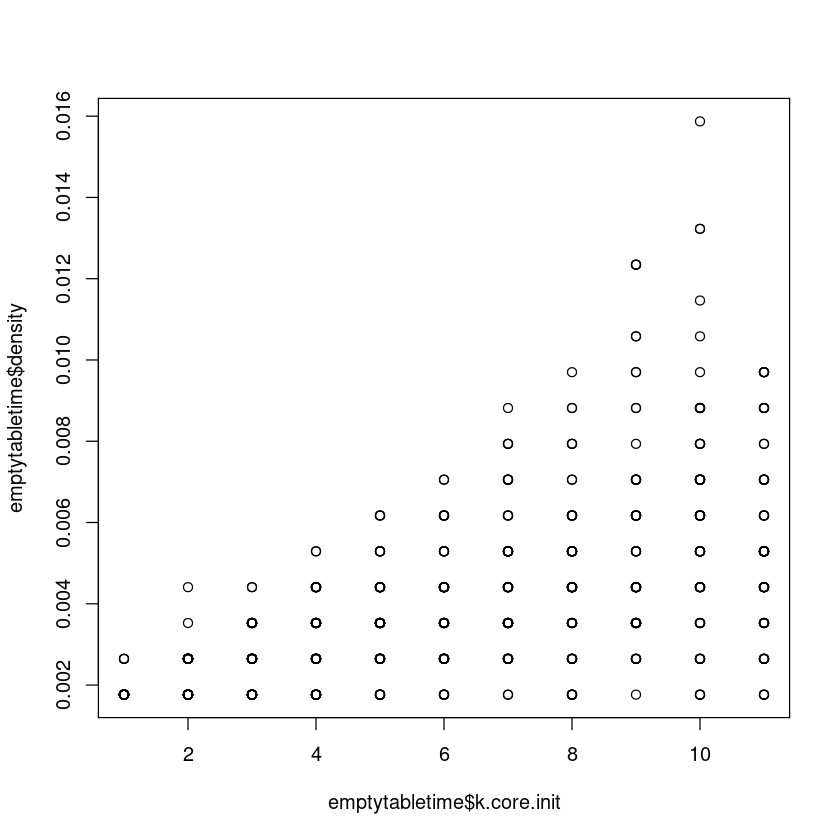

In [67]:
plot(emptytabletime$k.core.init, emptytabletime$density)

In [68]:
f <- function(x,a,b) {a * exp(b * x)} 



Call:
lm(formula = y ~ x)

Residuals:
            Min              1Q          Median              3Q             Max 
-6.46254344e-04 -6.24900810e-05 -2.92701921e-05  5.15105306e-05  5.73764365e-04 

Coefficients:
                  Estimate     Std. Error  t value   Pr(>|t|)
(Intercept) 0.001415562733 0.000201042999  7.04109 6.0448e-05
x           0.000418351241 0.000029642173 14.11338 1.9127e-07

Residual standard error: 0.000310889733 on 9 degrees of freedom
Multiple R-squared:  0.956769736,	Adjusted R-squared:  0.951966373 
F-statistic: 199.187485 on 1 and 9 DF,  p-value: 1.91272334e-07


[1] 0.9781460707


Call:
lm(formula = y ~ poly(x, 2))

Residuals:
            Min              1Q          Median              3Q             Max 
-5.40939949e-04 -1.01105359e-04 -4.31707132e-05  7.75746932e-05  6.15890123e-04 

Coefficients:
                   Estimate      Std. Error  t value   Pr(>|t|)
(Intercept)  3.92567018e-03  9.69757287e-05 40.48096 1.5262e-10
poly(x, 2)1  4.38770483e-03  3.21632106e-04 13.64200 8.0236e-07
poly(x, 2)2 -2.05655402e-04  3.21632106e-04 -0.63941    0.54043

Residual standard error: 0.000321632106 on 8 degrees of freedom
Multiple R-squared:  0.95887164,	Adjusted R-squared:  0.948589549 
F-statistic: 93.2564906 on 2 and 8 DF,  p-value: 2.86131445e-06


[1] 0.979219913792

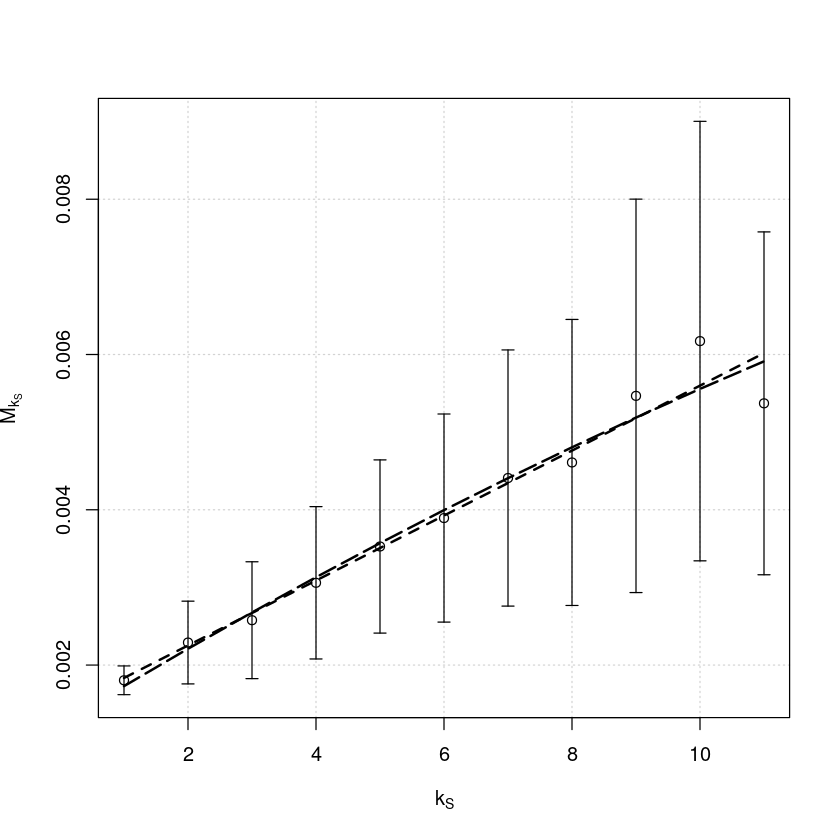

In [69]:
x <- toplot$k.core.init
y <- toplot$mean
dy <- toplot$std
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
     panel.first=grid()
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


#nonlin_mod=nls(y~a*exp(b*x),start=list(a=1,b=0.1)) #a is the starting value and b is the exponential start
#lines(x,predict(nonlin_mod),col="red")
#summary(nonlin_mod)

# constant
m<-lm(y~x)
summary(m)
cor(y,predict(m))
lines(x,predict(m),lty=2,col="black",lwd=2)

# polynomial
m<-lm(y ~ poly(x,2))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=5,col="black",lwd=2)



Formula: y ~ a * x/(b + x)

Parameters:
       Estimate    Std. Error t value   Pr(>|t|)
a 0.00985914310 0.00170043951 5.79800 0.00026013
b 8.10777560051 2.63372903572 3.07844 0.01317313

Residual standard error: 0.000426237736 on 9 degrees of freedom

Number of iterations to convergence: 10 
Achieved convergence tolerance: 4.04847145e-06


[1] 0.963507103602


Formula: y ~ 1 - exp(-(1 + b) * x)

Parameters:
         Estimate      Std. Error     t value   Pr(>|t|)
b -9.99395327e-01  3.35227177e-05 -29812.4793 < 2.22e-16

Residual standard error: 0.000750161085 on 10 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 2.8726882e-08


[1] 0.978184390588

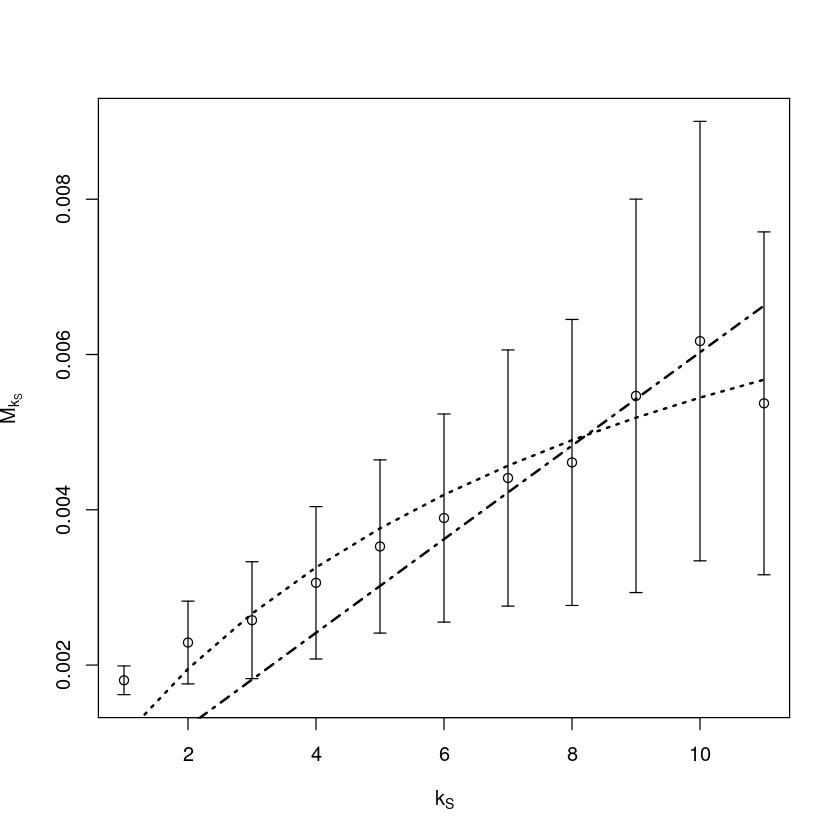

In [70]:
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)

# hyperbolic
m<-nls(y~a*x/(b+x), start=c(a=1,b=1))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=3,col="black",lwd=2)

# exponential
m<-nls(y~1 - exp(-(1+b)*x), start=list(b=0.1))
summary(m)
cor(y,predict(m))
#plot
lines(x,predict(m),lty=4,col="black",lwd=2)

In [71]:
pdf('mksonks.pdf')
plot(toplot$k.core.init, toplot$mean,
    ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)
dev.off()


png 
  2

Log y plot

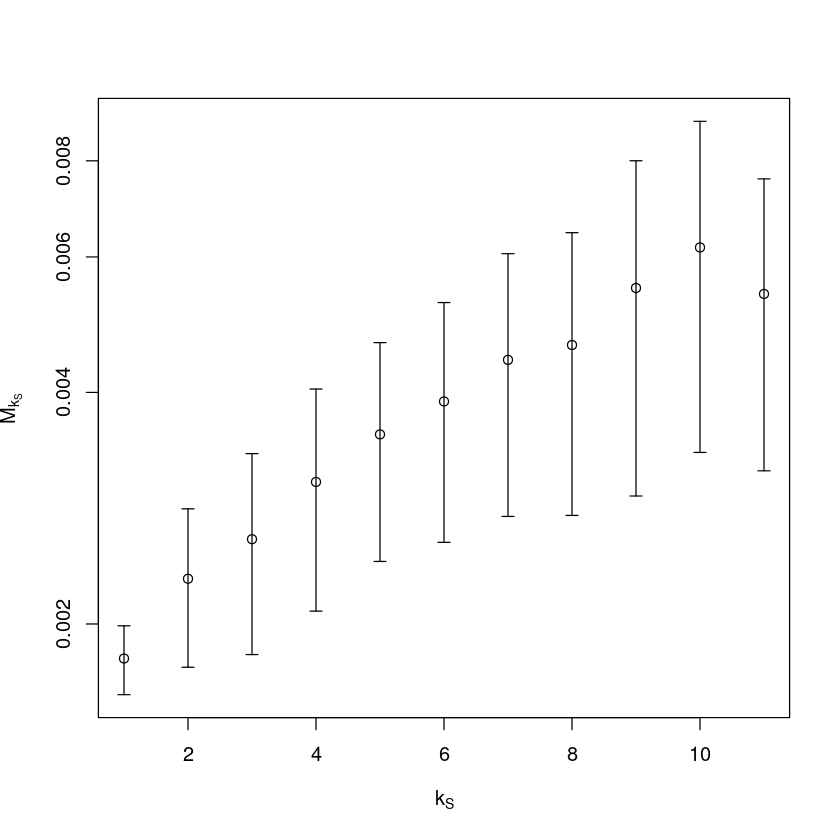

In [72]:
plot(x, y,
    ylim=range(c(y-dy, y+dy)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(x, y-dy, x, y+dy, length=0.05, angle=90, code=3)


In [73]:
pdf('logmksonks.pdf')
plot(toplot$k.core.init, toplot$mean,
     ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)
dev.off()

png 
  2